In [138]:
# Description: this program attempts to optimize users portfolio using the Effecient Frontier

# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [139]:
# Get the stock symbols/ tickers in the portfolio
# FAANG 

assets = ['FB', 'AMZN', 'AAPL', 'NFLX','GOOG']


In [140]:
# Assign weights to the stocks.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])


In [141]:
# Get the stock/ portfolio starting date
stockStartDate = '2013-01-01'

In [142]:
# Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-08-26'

In [143]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end=today)['Adj Close']

In [144]:
# Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.378807,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.515701,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.635078,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.249001,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.424622,13.880000,365.280823
...,...,...,...,...,...
2020-08-20,269.010010,3297.370117,473.100006,497.899994,1581.750000
2020-08-21,267.010010,3284.719971,497.480011,492.309998,1580.420044
2020-08-24,271.390015,3307.459961,503.429993,488.809998,1588.199951


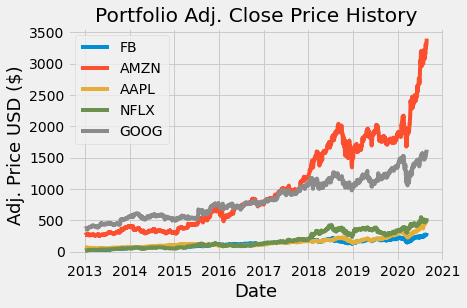

In [145]:
# Visually show the stock / portfolio 
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [146]:
# Show the daily simply return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-08-20,0.024449,0.011314,0.022190,0.027594,0.022113
2020-08-21,-0.007435,-0.003836,0.051532,-0.011227,-0.000841
2020-08-24,0.016404,0.006923,0.011960,-0.007109,0.004923


In [147]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.117397,0.052717,0.042351,0.055102,0.048752
AMZN,0.052717,0.092592,0.036608,0.061759,0.046752
AAPL,0.042351,0.036608,0.078236,0.032479,0.037215
NFLX,0.055102,0.061759,0.032479,0.211899,0.048980
GOOG,0.048752,0.046752,0.037215,0.048980,0.064834


In [148]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.05961557354297647

In [149]:
# Calculate the portfolio volatility aka standard deviation

port_volatility = np.sqrt(port_variance)
port_volatility

0.24416300609014557

In [150]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.37341599299327694

In [151]:
# Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance,2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility/ risk: ' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual return: 37.0%
Annual volatility/ risk: 24.0%
Annual variance: 6.0%


In [152]:
pip install PyPortfolioOpt

In [153]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [154]:
# Portfolio Optimization !

# Calculate the expeted returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimization for max sharpe ratio 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.13635), ('AMZN', 0.2858), ('AAPL', 0.28357), ('NFLX', 0.29428), ('GOOG', 0.0)])
Expected annual return: 41.8%
Annual volatility: 26.1%
Sharpe Ratio: 1.53


(0.41751646982524204, 0.26064548963542356, 1.525123148615639)

In [155]:
0.13635 + 0.2858 +0.28357 +0.29428

1.0

In [158]:
# Get the discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation {'FB': 7.0, 'AMZN': 1.0, 'AAPL': 9.0, 'NFLX': 9.0}
Funds remaining: $226.48
